# **House Price Prediction**

Masalah yang akan kita selesaikan adalah kita diberikan beberapa deskripsi rumah, Model ML kita harus prediksi harganya

In [1]:
#Import Library
import pandas as pd
import numpy as np
from sklearn import metrics #Cek metrik dari model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
names = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD','TAX','PTRATIO', 'B','LSTAT','MEDV']
#Import dataset
data = pd.read_csv(r"c:\Users\Dell\Project Data Science\housing.csv", delim_whitespace=True, names=names)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


CRIM per capita crime rate by town <br>
ZN proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS proportion of non-retail business acres per town <br>
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
NOX nitric oxides concentration (parts per 10 million) <br>
RM average number of rooms per dwelling <br>
AGE proportion of owner-occupied units built prior to 1940 <br>
DIS weighted distances to five Boston employment centres <br>
RAD index of accessibility to radial highways <br>
TAX full-value property-tax rate per 10,000usd <br>
PTRATIO pupil-teacher ratio by town <br>
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT % lower status of the population <br>

In [13]:
#Ganti MEDV ke Price sebagai Variabel Target
data1 = data.rename(columns = {'MEDV':'PRICE'})

In [6]:
#Cek bentuk (shape) data
data1.shape

(506, 14)

In [7]:
data1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
data1.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
#identifikasi nomor unik dalam sebuah nilai di dataset
data1.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
#Check missing values
data1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Pembuatan Scatter Plot

<Axes: xlabel='CRIM', ylabel='PRICE'>

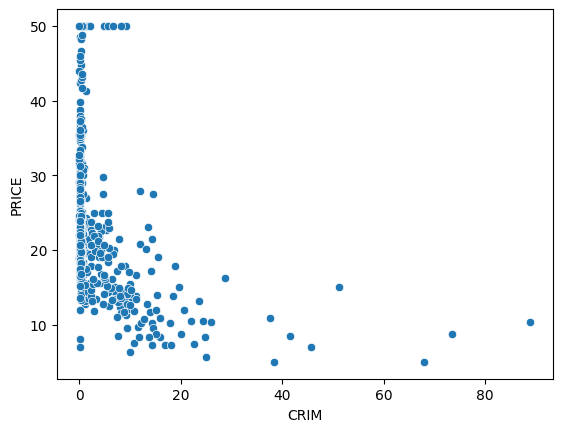

In [14]:
sns.scatterplot(data=data1, x="CRIM", y ="PRICE")
#Untuk selanjutnya setiap X dibandingkan dengan Y

In [15]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
#Mencari korelasi antara variable
corr = data1.corr()
corr.shape

(14, 14)

<Axes: >

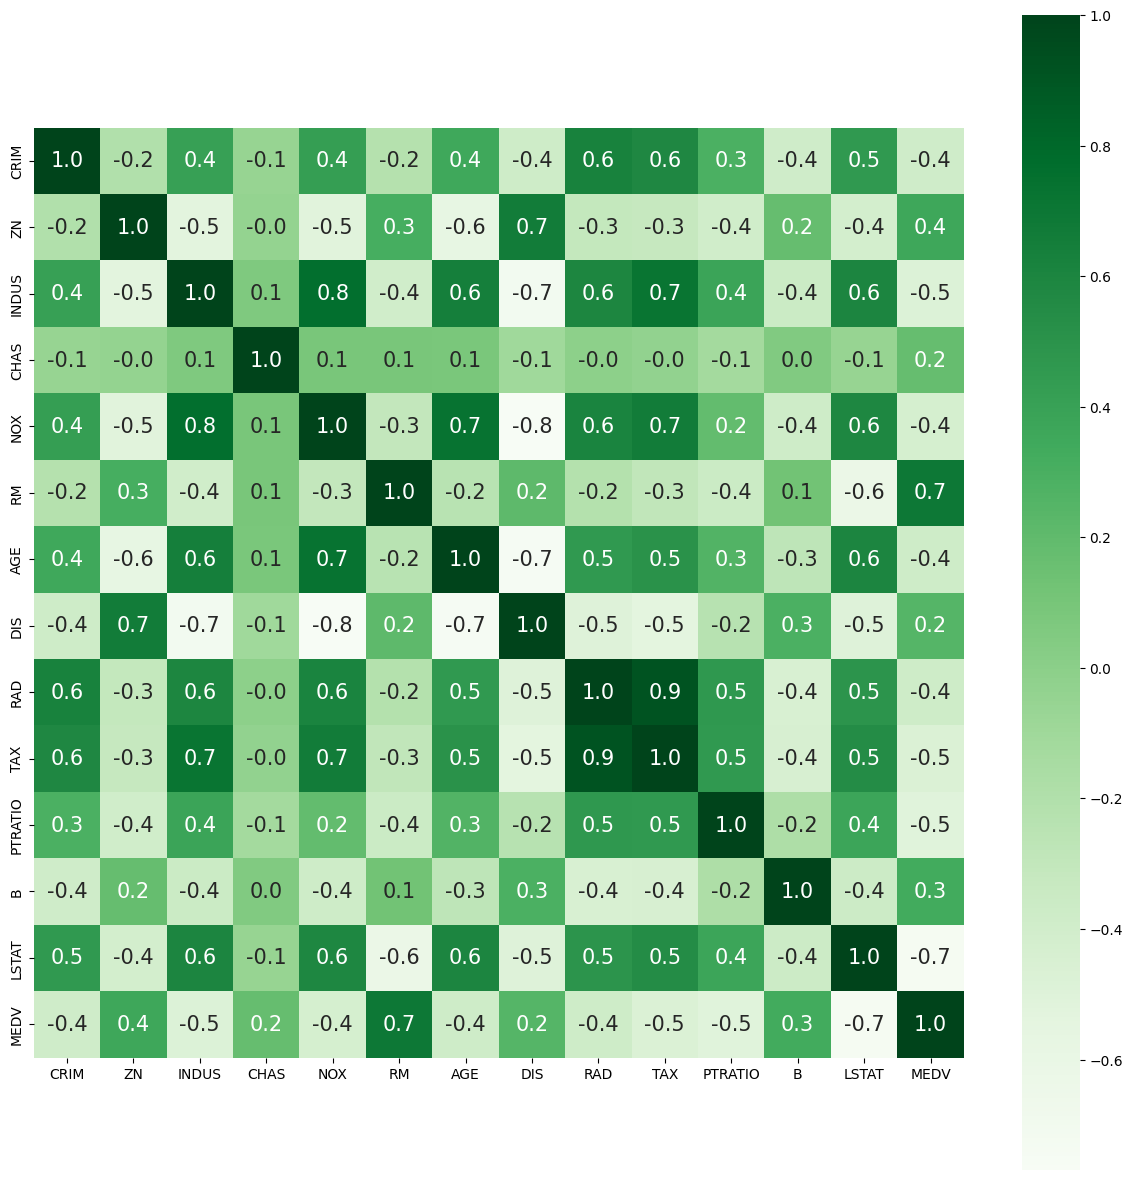

In [20]:
#Buat plot untuk correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')

In [21]:
#Bagi datanya menjadi Variabel independen dan dependen
X = data1.drop(['PRICE'], axis=1)
y = data1['PRICE']

In [22]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [23]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [24]:
#Split menjadi Train dan Test (Data Pre-Processing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

#Buat model Linear Regressor
lm = LinearRegression()

#Fit data ke Model untuk di Training
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
lm.intercept_

36.357041376595056

## Linear Regression Model Evaluation

In [42]:
#Model Evaluation
#Bandingkan hasil prediksi dengan train data
y_pred = lm.predict(X_train)

In [43]:
#Model Evaluation
print("R^2: ", metrics.r2_score(y_train, y_pred))
# print("Adjusted R^2: ", 1 - (1 - metrics.r2_score(y_train, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.7465991966746854
MAE:  3.08986109497113
MSE:  19.07368870346903
RMSE:  4.367343437774162


𝑅^2 : Merupakan ukuran hubungan linier antara X dan Y. Dimaknai sebagai proporsi varians variabel terikat yang dapat diprediksi dari variabel bebas.

Disesuaikan 𝑅^2 : R-kuadrat yang disesuaikan membandingkan kekuatan penjelas model regresi yang berisi jumlah prediktor berbeda.

MAE : Ini adalah rata-rata nilai absolut dari kesalahan. Ini mengukur perbedaan antara dua variabel kontinu, yaitu nilai y aktual dan prediksi.

MSE: Mean square error (MSE) sama seperti MAE, namun mengkuadratkan selisihnya sebelum menjumlahkan semuanya, bukan menggunakan nilai absolut.

RMSE: Mean square error (MSE) sama seperti MAE, namun mengkuadratkan selisihnya sebelum menjumlahkan semuanya, bukan menggunakan nilai absolut.

<function matplotlib.pyplot.show(close=None, block=None)>

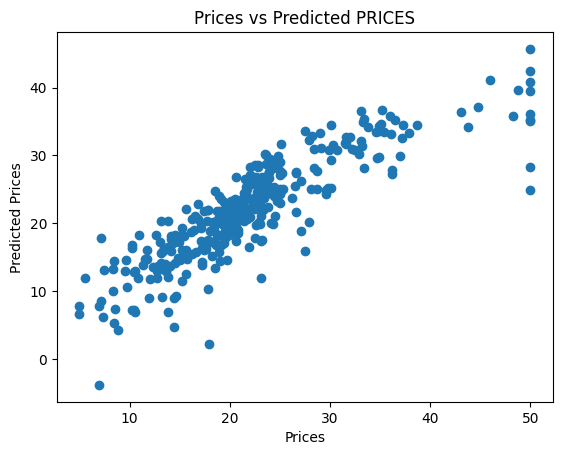

In [29]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted PRICES")
plt.show

In [48]:
#Prediksi model dalam data test
y_pred = lm.predict(X_test)

In [50]:
#Model Evaluation Test
acc_linreg = metrics.r2_score(y_test, y_pred)
print("R^2: ", acc_linreg)
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2:  0.7121818377409181
MAE:  3.8590055923707487
MSE:  30.053993307124273
RMSE:  5.4821522513629874


Di sini skor evaluasi model hampir sama dengan skor data training. Jadi modelnya tidak overfitting.

# **Random Forest Regressor**

In [44]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [53]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9790724932398003
MAE: 0.8375084745762708
MSE: 1.5752307966101724
RMSE: 1.2550819880032429


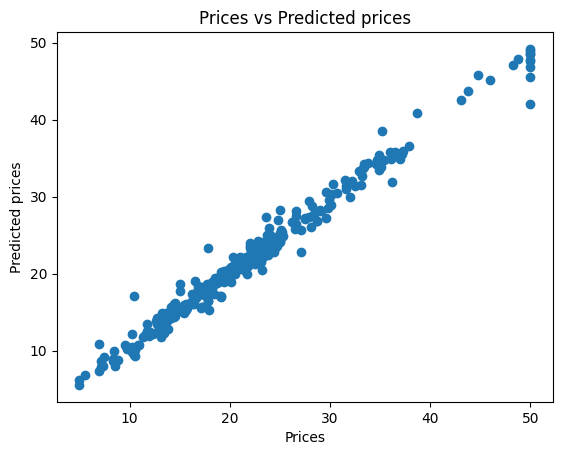

In [54]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [55]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [56]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8411757266313933
MAE: 2.42482894736842
MSE: 16.58444210526316
RMSE: 4.072400042390624


# XGBoost (Ensemble Model)

In [30]:
from xgboost import XGBRegressor

reg = XGBRegressor()

reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) – Balancing of positive and negative weights.


In [31]:
#Prediksi model dalam data
y_pred = reg.predict(X_train)

In [32]:
#Model Evaluation
print("R^2: ", metrics.r2_score(y_train, y_pred))
# print("Adjusted R^2: ", 1 - (1 - metrics.r2_score(y_train, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.9999984393569055
MAE:  0.0075487993531308095
MSE:  0.00011747090053634414
RMSE:  0.010838399353056897


<function matplotlib.pyplot.show(close=None, block=None)>

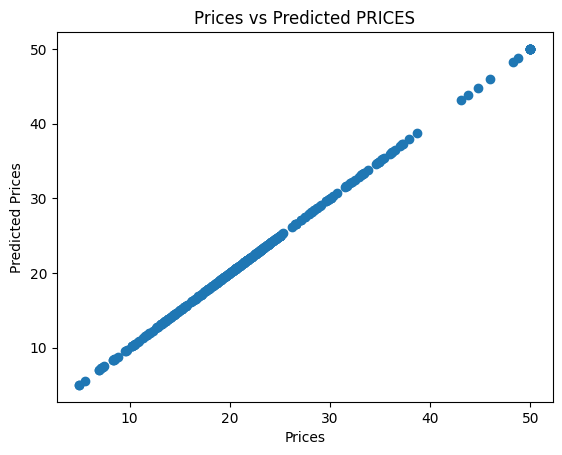

In [33]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted PRICES")
plt.show

In [34]:
#Prediksi hasil test
y_test_pred = reg.predict(X_test)

In [36]:
#Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print("R^2: ", acc_xgb)
# print("Adjusted R^2: ", 1 - (1 - metrics.r2_score(y_test, y_test_pred))
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2:  0.876198092300946
MAE:  2.3247050780999032
MSE:  12.927404150566876
RMSE:  3.5954699485000394


In [57]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,87.619809
1,Random Forest,84.117573
0,Linear Regression,71.218184
